In [5]:
from tqdm import tqdm
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

plt.style.use('dark_background')

In [106]:
with open('points.geojson') as f:
    res = json.load(f)

node_id = np.zeros(len(res['features']), dtype='int64')
node_ax = np.zeros((len(res['features']), 2), dtype=float)

for i in tqdm(range(len(res['features']))):
    node_id[i] = int(res['features'][i]['id'][5:])
    node_ax[i][0] = float(res['features'][i]['geometry']['coordinates'][0])
    node_ax[i][1] = float(res['features'][i]['geometry']['coordinates'][1])

100%|██████████| 42483/42483 [00:00<00:00, 193047.82it/s]


In [113]:
df = pd.read_json('Trulala')

# roads[i][0] - id
# roads[i][1] - type
# roads[i][2] - in
# roads[i][3] - out
roads = np.zeros((df.shape[0], 4), dtype='int64')

for i in tqdm(range(df.shape[0])):
    if df['nodes'][i][0] in node_id and df['nodes'][i][1] in node_id:
        roads[i][0] = df['r_id'][i]
        roads[i][1] = df['type'][i]
        roads[i][2] = df['nodes'][i][0]
        roads[i][3] = df['nodes'][i][1]


100%|██████████| 46446/46446 [00:03<00:00, 12442.24it/s]


100%|██████████| 46446/46446 [01:28<00:00, 527.02it/s]


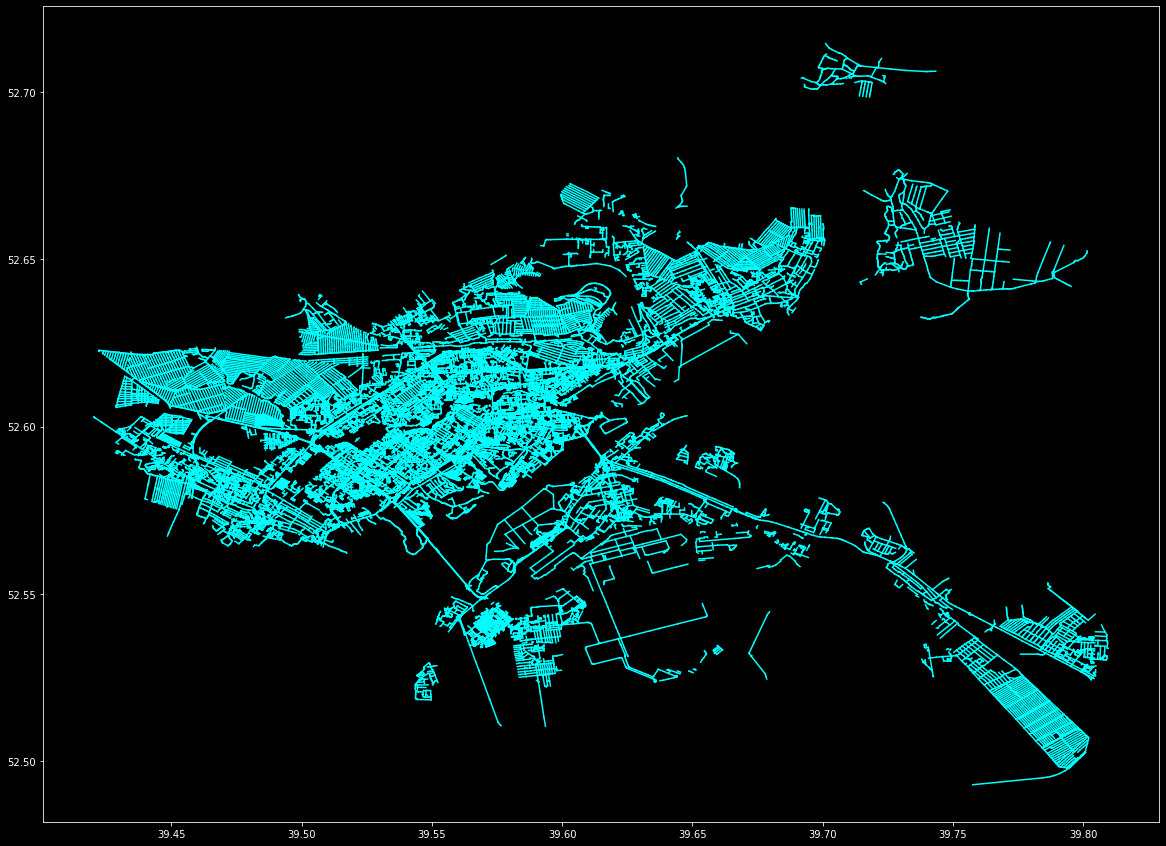

In [112]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 15)

for i in tqdm(range(roads.shape[0])):
    p1, p2 = roads[i][2:]
    x1, y1 = node_ax[np.where(node_id == p1)[0][0]]
    x2, y2 = node_ax[np.where(node_id == p2)[0][0]]
    plt.plot((x1, x2), (y1, y2), color='cyan')